# 20Ïû•. Íµ∞ÏßëÌôî (Clustering)

In [1]:
!pip install seaborn

## 1. Îç∞Ïù¥ÌÑ∞ÏÖã (IRIS)
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [2]:
import requests
import os

data = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
path = os.path.join('data', 'iris.data')
with open(path, "w") as f:
  f.write(data.text)

### 1.1 Îç∞Ïù¥ÌÑ∞ÏÖã ÏùΩÍ∏∞

In [3]:
import pandas as pd
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
dataset = pd.read_csv(path, names=column_names)
dataset.head()

sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ

### 2.1 ÏöîÏïΩ ÌÜµÍ≥ÑÎüâ

In [5]:
dataset.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

### 2.2 Îã®Ïùº Î≥ÄÏàò Î∂ÑÏÑù

#### 2.2.1 ÌûàÏä§ÌÜ†Í∑∏Îû®

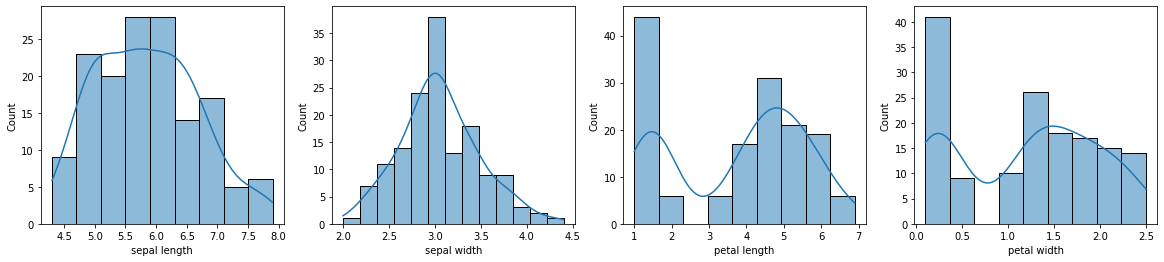

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[20,4])
for i, column in enumerate(dataset.describe().columns):
    plt.subplot(1,4,i+1)
    sns.histplot(data=dataset, x=column, kde=True)
plt.show()

#### 2.2.2 Î∞ïÏä§ ÌîåÎ°Ø

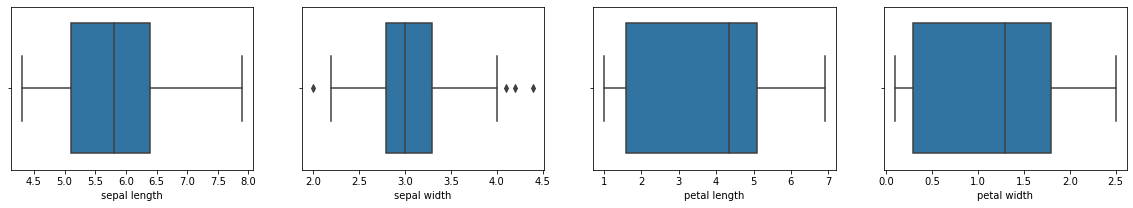

In [7]:
plt.figure(figsize=[20,3])
for i in enumerate(dataset.describe().columns[:4]):
    plt.subplot(1,4,i[0]+1)
    sns.boxplot(x=dataset[i[1]])

plt.show()

### 2.3 Îëê Î≥ÄÏàò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
#### 2.3.1 ÏÇ∞Ìè¨ÎèÑ ÌñâÎ†¨

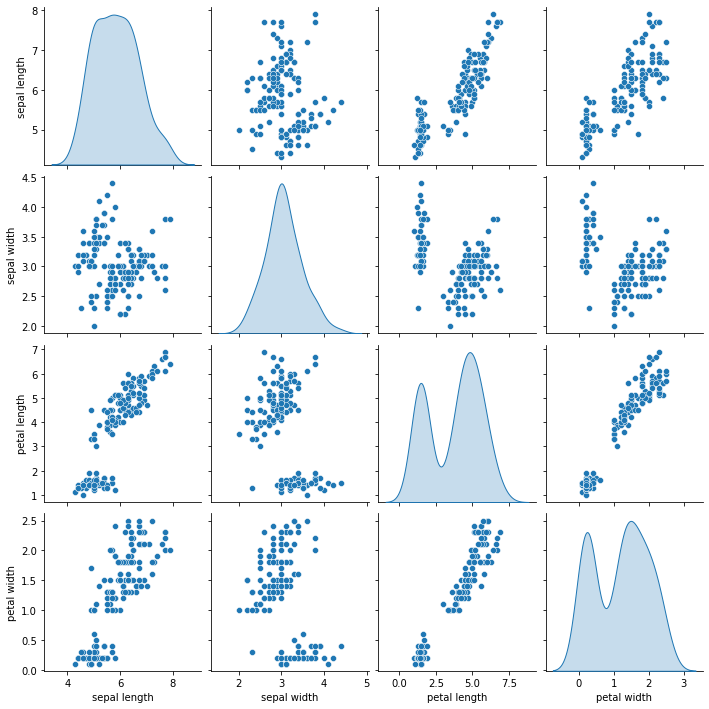

In [8]:
sns.pairplot(dataset, diag_kind="kde")
plt.show()

#### 2.3.2 ÌûàÌä∏Îßµ

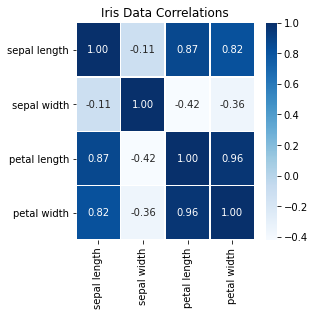

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(dataset.corr(), linewidths=.5, annot=True, fmt=".2f", cmap='Blues')
plt.title('Iris Data Correlations')
plt.show()

## 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### 3.1 Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú

In [10]:
clusterdata = dataset.iloc[:,:-1]
inputs = clusterdata.iloc[:,:].values.tolist()
columns = clusterdata.keys().tolist()
column2index ={ column : i for i, column in enumerate(columns)}
print('columns = ', columns)
print('column2index = ', column2index)

columns =  ['sepal length', 'sepal width', 'petal length', 'petal width']
column2index =  {'sepal length': 0, 'sepal width': 1, 'petal length': 2, 'petal width': 3}


### 3.2 Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî

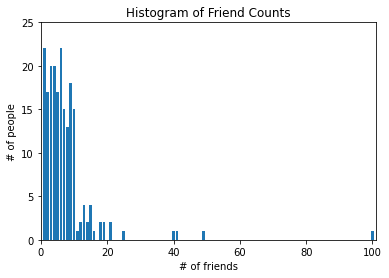

In [11]:
from scratch.working_with_data import scale, rescale, Vector
from typing import List

inputs_normed = rescale(inputs)

## 4. K-ÌèâÍ∑† Íµ∞ÏßëÌôî

### Q1. ÏÜêÏã§ Í≥°ÏÑ†ÏùÑ Î≥¥Í≥† K ÏÑ†ÌÉùÌïòÍ∏∞
ÏÜêÏã§ÏùÑ ÏµúÏÜåÌôî ÌïòÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ùêæÎ•º Ï∞æÏïÑÎ≥¥ÏãúÏò§.
Îã®, ùêæÎäî 20ÍπåÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Îùº.

0it [00:00, ?it/s]
changed: 1 / 150: : 2it [00:00, 222.17it/s]
changed: 2 / 150: : 7it [00:00, 199.98it/s]
changed: 2 / 150: : 7it [00:00, 152.19it/s]
changed: 1 / 150: : 7it [00:00, 189.24it/s]
changed: 1 / 150: : 8it [00:00, 135.59it/s]
changed: 2 / 150: : 7it [00:00, 118.65it/s]
changed: 2 / 150: : 14it [00:00, 137.26it/s]
changed: 1 / 150: : 10it [00:00, 153.85it/s]
changed: 1 / 150: : 11it [00:00, 142.85it/s]
changed: 1 / 150: : 17it [00:00, 153.15it/s]
changed: 1 / 150: : 8it [00:00, 100.00it/s]
changed: 1 / 150: : 13it [00:00, 108.34it/s]
changed: 1 / 150: : 13it [00:00, 97.03it/s] 
changed: 2 / 150: : 11it [00:00, 113.42it/s]
changed: 1 / 150: : 8it [00:00, 48.19it/s]
changed: 3 / 150: : 6it [00:00, 49.59it/s]
changed: 1 / 150: : 7it [00:00, 57.85it/s]
changed: 1 / 150: : 14it [00:00, 93.96it/s] 
changed: 3 / 150: : 6it [00:00, 72.89it/s]


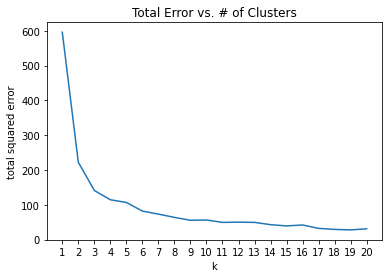

In [12]:
from typing import List
from scratch.linear_algebra import vector_mean, Vector, squared_distance
import itertools
import random
import tqdm

#Ìï¥Î∞çÍ±∞Î¶¨
def num_differences(v1: Vector, v2: Vector) -> int:
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

#Íµ∞ÏßëÏùò ÌèâÍ∑† Í≥ÑÏÇ∞
def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

#Kmeans ÌÅ¥ÎûòÏä§
class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k                      # number of clusters
        self.means = None
        self.assignments = None

    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        self.assignments = [random.randrange(self.k) for _ in inputs]
        
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, self.assignments)
                new_assignments = [self.classify(input) for input in inputs]

                # Check how many assignments changed and if we're done
                num_changed = num_differences(self.assignments, new_assignments)
                if num_changed == 0:
                    return

                # Otherwise keep the new assignments, and compute new means
                self.assignments = new_assignments
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

#ÏÜêÏã§ Í≥ÑÏÇ∞
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]

    return sum(squared_distance(input, means[cluster])
               for input, cluster in zip(inputs, assignments))

ks = range(1, 21)
errors = [squared_clustering_errors(inputs_normed, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

### Q2. Íµ∞ÏßëÌôî Î∞è Í≤∞Í≥º ÌôïÏù∏ (Q)
ùêæ=ùüëÏúºÎ°ú Íµ∞ÏßëÌôîÎ•º Ìï¥ÏÑú Îã§ÏùåÍ≥º Í∞ôÏù¥ Íµ∞ÏßëÌôî Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥ Î≥¥Îùº.

In [13]:
random.seed(20)
clusterer = KMeans(k=3)
clusterer.train(inputs_normed)
assignments = clusterer.assignments

changed: 2 / 150: : 6it [00:00, 255.04it/s]


#### datasetÏóê k_means Ïª¨Îüº Ï∂îÍ∞Ä

In [14]:
dataset["k_means"] = assignments
dataset.head()

sepal length  sepal width  petal length  petal width      species  k_means
0           5.1          3.5           1.4          0.2  Iris-setosa        1
1           4.9          3.0           1.4          0.2  Iris-setosa        1
2           4.7          3.2           1.3          0.2  Iris-setosa        1
3           4.6          3.1           1.5          0.2  Iris-setosa        1
4           5.0          3.6           1.4          0.2  Iris-setosa        1

#### speciesÏôÄ k_means Í≤∞Í≥º ÎπÑÍµê

In [15]:
dataset[dataset['k_means']==0].head()

sepal length  sepal width  petal length  petal width          species  \
41           4.5          2.3           1.3          0.3      Iris-setosa   
53           5.5          2.3           4.0          1.3  Iris-versicolor   
55           5.7          2.8           4.5          1.3  Iris-versicolor   
57           4.9          2.4           3.3          1.0  Iris-versicolor   
59           5.2          2.7           3.9          1.4  Iris-versicolor   

    k_means  
41        0  
53        0  
55        0  
57        0  
59        0

In [16]:
dataset.groupby(["k_means", "species"])['k_means'].count()

k_means  species        
0        Iris-setosa         1
         Iris-versicolor    37
         Iris-virginica      8
1        Iris-setosa        49
2        Iris-versicolor    13
         Iris-virginica     42
Name: k_means, dtype: int64

#### Íµ∞ÏßëÌôî Í≤∞Í≥º ÏãúÍ∞ÅÌôî

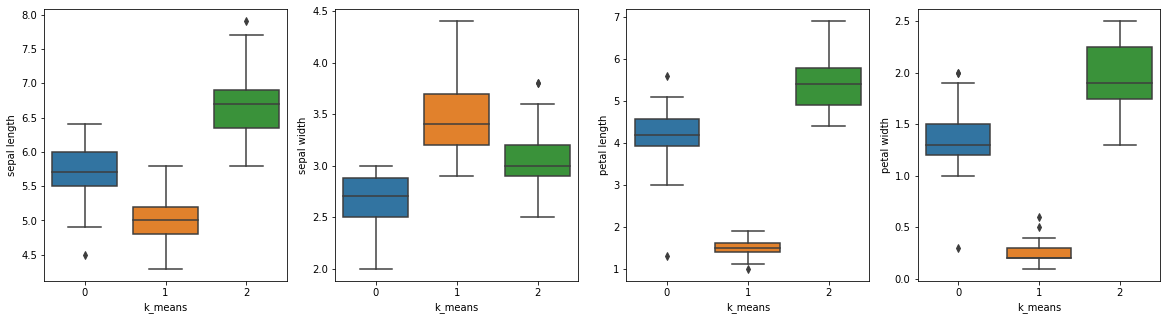

In [17]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,4,1)
sns.boxplot(x='k_means', y='sepal length', data=dataset)
plt.subplot(1,4,2)
sns.boxplot(x='k_means', y='sepal width', data=dataset)
plt.subplot(1,4,3)
sns.boxplot(x='k_means', y='petal length', data=dataset)
plt.subplot(1,4,4)
sns.boxplot(x='k_means', y='petal width', data=dataset)
plt.show()

### Q3. Íµ∞ÏßëÌôî Î∞è Í≤∞Í≥º ÌôïÏù∏
Í∞Å Íµ∞ÏßëÏù¥ Íµ¨Î∂ÑÎêòÎèÑÎ°ù Îëê Î≥ÄÏàòÏùò ÏÇ∞Ìè¨ÎèÑÎ•º Í∑∏Î¶¨Îäî Ìï®Ïàò plot_cluster Íµ¨ÌòÑÌïòÏãúÏò§.

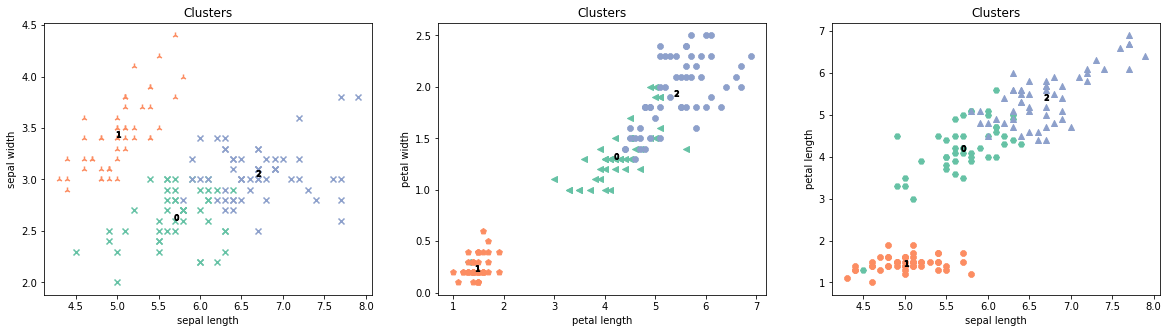

In [18]:
import random
markerstyles = ['o', 'v', '^', '<', '8', '1', '2', 'x', 's', 'p', '*', 'h', 'H', 
                'D', 'd', 'P', 'X']

def plot_cluster(clusters, feat1, feat2):
    rgb_values = sns.color_palette("Set2", len(clusters))
    numbers = [i for i in range(len(clusters))]
    markers = [random.choice(markerstyles) for i in range(len(clusters))]
    new_clusters = [[] for i in range(3)]
    for i in range(len(clusters)):
        each_cluster = clusters[i]
        for j in range(len(each_cluster)):
            tmp = []
            x = each_cluster[j][feat1]
            y = each_cluster[j][feat2]
            tmp.append(x)
            tmp.append(y)
            new_clusters[i].append(tmp)
        
    for i, cluster, marker, color in zip(numbers,
                                        new_clusters,
                                        markers,
                                        rgb_values):
        xs, ys = zip(*cluster)  # magic unzipping trick
        plt.scatter(xs, ys, color=color, marker=marker)

        # put a number at the mean of the cluster
        x, y = vector_mean(cluster)
        plt.plot(x, y, marker='$' + str(i) + '$', color='black')

    plt.title("Clusters")
    plt.xlabel(columns[feat1])
    plt.ylabel(columns[feat2])

clusters = [[] for i in range(3)]
for input, assignment in zip(inputs, assignments):
    clusters[assignment].append(input)

plt.subplots(figsize=(20, 5))
plt.subplot(1,3,1)
plot_cluster(clusters, column2index["sepal length"], column2index["sepal width"])
plt.subplot(1,3,2)
plot_cluster(clusters, column2index["petal length"], column2index["petal width"])
plt.subplot(1,3,3)
plot_cluster(clusters, column2index["sepal length"], column2index["petal length"])
plt.show()

## 5. Í≥ÑÏ∏µ Íµ∞ÏßëÌôî (Hierarchical Clustering)

### Q4. Íµ∞ÏßëÌôî Î∞è Í≤∞Í≥º ÌôïÏù∏
ùêæ=ùüëÏúºÎ°ú ÏµúÏû• Í±∞Î¶¨(max) Í∏∞Ï§ÄÏúºÎ°ú Íµ∞ÏßëÌôîÎ•º Ìï¥ÏÑú Îã§ÏùåÍ≥º Í∞ôÏù¥ Íµ∞ÏßëÌôî Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥ Î≥¥Îùº.

In [19]:
from typing import NamedTuple, Union, Callable, Tuple
from scratch.linear_algebra import distance

class Leaf(NamedTuple):
    index: int
    value: Vector
        
class Merged(NamedTuple):
    children: tuple
    order: int

Cluster = Union[Leaf, Merged]

def get_assignment(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.index]
    else:
        return [index
                for child in cluster.children
                for index in get_assignment(child)]

def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)
                         for v2 in get_values(cluster2)])

def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children
    
def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf')  # was never merged
    else:
        return cluster.order
    
def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(i,input) for i,input in enumerate(inputs)]

    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)

    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]),
                      key=pair_distance)

        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]

        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

def generate_clusters(base_cluster: Cluster,
                      num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]

        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters

def make_h_assignment(cluster_index, k):
    tmp_assignment = [random.randrange(3) for _ in inputs]
    for i in range(k):
        for j in cluster_index[i]:
            tmp_assignment[j] = i

    return tmp_assignment

base_cluster = bottom_up_cluster(inputs_normed, max)
h_clusters = [get_values(cluster) for cluster in generate_clusters(base_cluster, 3)]
h_clusters_index = [get_assignment(cluster) for cluster in generate_clusters(base_cluster, 3)]
h_assignments = make_h_assignment(h_clusters_index, 3)

#### datasetÏóê h_clustering Ïª¨Îüº Ï∂îÍ∞Ä

In [20]:
dataset["h_clustering"] = h_assignments
dataset.head()

sepal length  sepal width  petal length  petal width      species  k_means  \
0           5.1          3.5           1.4          0.2  Iris-setosa        1   
1           4.9          3.0           1.4          0.2  Iris-setosa        1   
2           4.7          3.2           1.3          0.2  Iris-setosa        1   
3           4.6          3.1           1.5          0.2  Iris-setosa        1   
4           5.0          3.6           1.4          0.2  Iris-setosa        1   

   h_clustering  
0             1  
1             1  
2             1  
3             1  
4             1

#### h_clusteringÍ≥º species ÎπÑÍµê

In [21]:
dataset.groupby(["h_clustering", "species"])['h_clustering'].count()

h_clustering  species        
0             Iris-versicolor    29
              Iris-virginica     48
1             Iris-setosa        49
2             Iris-setosa         1
              Iris-versicolor    21
              Iris-virginica      2
Name: h_clustering, dtype: int64

#### Íµ∞ÏßëÌôî Í≤∞Í≥º ÏãúÍ∞ÅÌôî

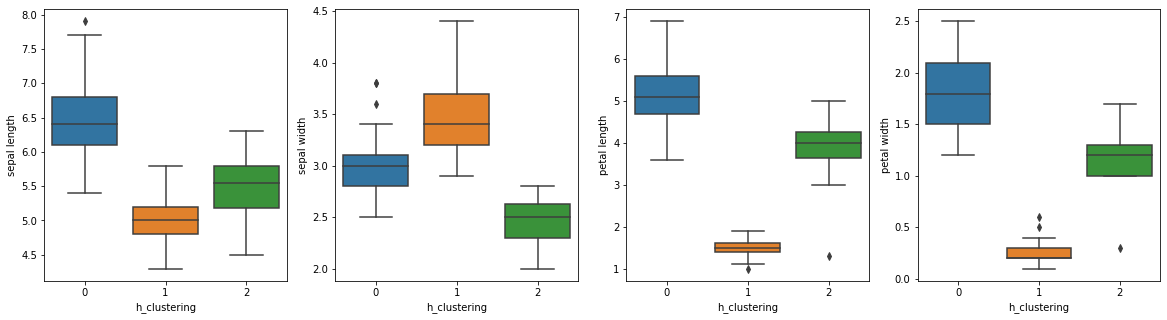

In [22]:
plt.subplots(figsize=(20, 5))
plt.subplot(1,4,1)
sns.boxplot(x = 'h_clustering', y = 'sepal length', data= dataset)
plt.subplot(1,4,2)
sns.boxplot(x = 'h_clustering', y = 'sepal width', data= dataset)
plt.subplot(1,4,3)
sns.boxplot(x = 'h_clustering', y = 'petal length', data= dataset)
plt.subplot(1,4,4)
sns.boxplot(x = 'h_clustering', y = 'petal width', data= dataset)
plt.show()

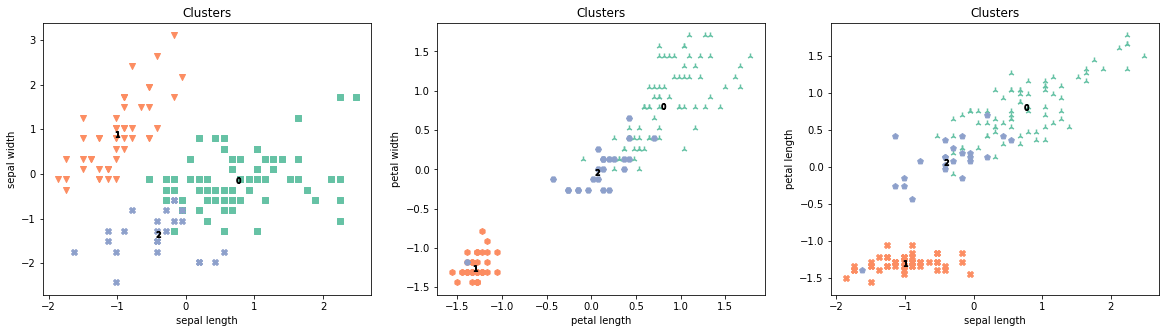

In [23]:
clusters = [[] for i in range(3)]
for input, h_assignment in zip(inputs, h_assignments):
    clusters[h_assignment].append(input)

plt.subplots(figsize=(20, 5))
plt.subplot(1,3,1)
plot_cluster(h_clusters, column2index["sepal length"], column2index["sepal width"])
plt.subplot(1,3,2)
plot_cluster(h_clusters, column2index["petal length"], column2index["petal width"])
plt.subplot(1,3,3)
plot_cluster(h_clusters, column2index["sepal length"], column2index["petal length"])
plt.show()